강남 넣기
```
'번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y', '평수', '동',
       '가까운공원ID', '강남여부', '학군', 'target',
RMSE test: 29394.383945172183
```

### 계약_건축년도_차이 추가
```
'번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y', 'target', '평수',
       '동', '가까운공원ID', 'is_test', '계약_건축년도_차이', '학군'

29565
```

### 학군제거
```
'번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y', 'target', '평수',
       '동', '가까운공원ID', 'is_test', '계약_건축년도_차이'
29725
```

### 학군추가

```
'번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y', 'target', '평수',
       '동', '가까운공원ID', 'is_test', '학군'
       
29167
```

### 지하철 거리 추가 기각

```
'번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y', 'target', '평수',
       '동', '가까운공원ID', 'is_test', '학군', 'nearest_subway_distance'

29368
```

### '아파트ID', 추가

```
'번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y', 'target', '평수',
       '동', '아파트ID', '가까운공원ID', 'is_test', '학군'

29004
```

### '아파트ID거리' 추가
```
'번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y', 'target', '평수',
       '동', '아파트ID', '아파트ID거리', '가까운공원ID', 'is_test', '학군'
       
28703
```

### '공원갯수',
```
'번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y', 'target', '평수',
       '동', '아파트ID', '아파트ID거리', '가까운공원ID', '공원갯수', 'is_test', '학군'

28896
```

###  '공원총면적',
```
'번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y', 'target', '평수',
       '동', '아파트ID', '아파트ID거리', '가까운공원ID', '공원총면적', 'is_test', '학군'
       
29137
```

### 한강지천생활권점수

```
'번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y', 'target', '평수',
       '동', '아파트ID', '아파트ID거리', '가까운공원ID', '한강지천생활권점수', 'is_test', '학군'
29157

```



In [80]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from backup.module.preprocess import drop_columns

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'AppleGothic'}) # 폰트 설정
plt.rc('font', family='AppleGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import eli5
from eli5.sklearn import PermutationImportance

In [81]:
# sys.path를 수정하여 모듈 경로를 설정
import sys
import os
import pandas as pd

# 프로젝트 루트 경로 추가
project_root = os.path.abspath("..")
sys.path.append(project_root)
# 모든 컬럼 출력 설정
# pd.set_option('display.max_columns', None)
# 모든 행 출력 설정
# pd.set_option('display.max_rows', None)

import module

In [82]:
df, df_test_y = module.file_load.load_current_version()

In [83]:
df['is_test'].value_counts()      # train과 test data가 하나로 합쳐진 것을 확인할 수 있습니다.

is_test
0    1097155
1       5607
Name: count, dtype: int64

In [84]:
df.columns

Index(['index', '시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층',
       '건축년도', '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)',
       'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)',
       'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적',
       'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하',
       'k-135㎡초과', 'k-홈페이지', 'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태',
       '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일',
       '사용허가여부', '관리비 업로드', '좌표X', '좌표Y', '단지신청일', 'target', '금리_단기1년전차이',
       'nearest_subway_distance', 'nearest_bus_distance', '1차역세권', '2차역세권',
       '1차버스정류장', '경과연도', '경과구분', '평수', '층_그룹', '평수_그룹', '시', '구', '동',
       '아파트ID', '아파트ID거리', 'nearest_park_distance', '가까운공원이름', '가까운공원ID',
       '공원갯수', '공원총면적', '공원생활권점수', '산책로갯수', '산책로총길이', '산책생활권점수', '생태문화길갯수',
       '생태문화길총길이', '생태문화생활권점수', '한강지천길갯수', '한강지

In [85]:
df[df['아파트명'] == '상봉듀오트리스'][['target','구', '동','아파트명','계약년월', '계약일', '층','건축년도', '좌표X', '좌표Y',  'nearest_subway_distance']]

,target,구,동,아파트명,계약년월,계약일,층,건축년도,좌표X,좌표Y,nearest_subway_distance
93693,70000.0,중랑구,상봉동,상봉듀오트리스,201801,18,20,2016,127.092204,37.597362,220
93694,75000.0,중랑구,상봉동,상봉듀오트리스,201802,9,24,2016,127.092204,37.597362,220
93695,68000.0,중랑구,상봉동,상봉듀오트리스,201802,28,19,2016,127.092204,37.597362,220
93696,69500.0,중랑구,상봉동,상봉듀오트리스,201803,2,8,2016,127.092204,37.597362,220
93697,68000.0,중랑구,상봉동,상봉듀오트리스,201803,4,7,2016,127.092204,37.597362,220
...,...,...,...,...,...,...,...,...,...,...,...
622133,66500.0,중랑구,상봉동,상봉듀오트리스,201605,31,20,2016,127.092204,37.597362,220
622134,68080.0,중랑구,상봉동,상봉듀오트리스,201606,3,31,2016,127.092204,37.597362,220
622135,94908.0,중랑구,상봉동,상봉듀오트리스,201606,14,31,2016,127.092204,37.597362,220
3419,NaN,중랑구,상봉동,상봉듀오트리스,202212,25,27,2016,127.092204,37.597362,220


In [130]:
# 결측치가 많거나 필요 없는 컬럼을 정리한다
drop_columns = [
    'index', '시군구',  '본번', '부번', 
      '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)',
       'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)',
       'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적',
       'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하',
       'k-135㎡초과', 'k-홈페이지', 'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태',
       '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일',
       '사용허가여부', '관리비 업로드','단지신청일', 
       'nearest_subway_distance', 'nearest_bus_distance', '1차역세권', '2차역세권',
       '1차버스정류장', '경과연도', '경과구분',  '층_그룹', '평수_그룹', '시',
        'nearest_park_distance', '가까운공원이름', 
        '공원생활권점수', '산책로갯수', '산책로총길이', '산책생활권점수', '생태문화길갯수',
       '생태문화길총길이', '생태문화생활권점수', '한강지천길갯수', '한강지천길총길이', '숲세권종합점수',
       '숲세권등급', '한강거리', '지가지수', '아파트전세_전기대비증감률', '실업률', '민간소비', '소비자심리지수',
       '경제심리지수', '여수신 금리차','계약일','전용면적(㎡)', '공원갯수', '공원총면적', '한강지천생활권점수','금리_단기1년전차이'
]

# 전처리

In [131]:
# module.preprocess.컬럼_정리(df)
df_select = module.preprocess.drop_columns(df, drop_columns)

In [132]:
df_select.columns

Index(['번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y', 'target',
       '금리_단기1년전차이', '평수', '구', '동', '아파트ID', '아파트ID거리', '가까운공원ID', 'is_test'],
      dtype='object')

In [133]:
# df_select = df_select[df_select['계약년월'] > 201701]
module.preprocess.번지_본번_부번_결측채우기(df_select)
# module.preprocess.한강거리_add(df_select)

# 파생변수

In [134]:
# module.preprocess.강남_add(df_select)

# module.preprocess.계약_건축년도_차이(df_select)
# module.preprocess.계약_건축년도_차이(df_select)
# module.preprocess.신축_add(df_select)
# # 강남 8학군 지역 설정
gangnam_8_schools = ['강남구', '서초구', '송파구']
# 학군 변수 추가: 강남 8학군이면 1, 아니면 0
df_select['학군'] = df_select['구'].apply(lambda x: 1 if x in gangnam_8_schools else 0)

# subway_df = module.file_load.load_지하철()
# df_select = module.preprocess.calculate_nearest_subway_distance(df_select, subway_df)

In [135]:
final_drop_columns = ['구']
df_select.drop(final_drop_columns, axis=1, inplace=True)

# Model Training

## 범주형 변수 Encoding

In [136]:
model_data = df_select.copy()
# model_data['한강거리'] = np.log1p(model_data['한강거리'])

In [137]:
model_data.columns


Index(['번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y', 'target',
       '금리_단기1년전차이', '평수', '동', '아파트ID', '아파트ID거리', '가까운공원ID', 'is_test',
       '학군'],
      dtype='object')

In [138]:
dt_train, dt_test = module.preprocess.split_train_test(model_data)
categorical_columns_v2 = module.preprocess.범주형_filter(dt_train)
label_encoders = module.preprocess.범주형_encoding(dt_train, dt_test, categorical_columns_v2)
print(dt_train.shape, dt_test.shape)

100%|██████████| 6/6 [00:01<00:00,  4.52it/s]

(1097155, 16) (5607, 16)


## Model Training


# 훈련데이터 분할

In [139]:
X_train, X_val, y_train, y_val = module.preprocess.holdout_split_X_y(dt_train)

In [140]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((877724, 15), (219431, 15), (877724,), (219431,))

In [141]:
X_train.head(1)

,번지,아파트명,계약년월,층,건축년도,도로명,좌표X,좌표Y,금리_단기1년전차이,평수,동,아파트ID,아파트ID거리,가까운공원ID,학군
586784,1444,3131,201605,11,1988,4922,127.015602,37.498732,-0.25,24,151,1404,18.501546,1612,1


In [142]:
# RandomForestRegressor 를 이용해 회귀 모델을 적합시키겠습니다.
model = RandomForestRegressor(n_estimators=5, criterion='squared_error', random_state=1, n_jobs=-1)
model.fit(X_train, y_train)
# pred = model.predict(X_val)
# print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(y_val, pred))}')

RandomForestRegressor(n_estimators=5, n_jobs=-1, random_state=1)

In [143]:
X_test = dt_test.drop(['target'], axis=1)

real_test_pred = model.predict(X_test)
print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(df_test_y, real_test_pred))}')


RMSE test: 28513.875458671933


In [100]:
X_test.shape, real_test_pred.shape, df_test_y.shape

((5607, 15), (5607,), (5607, 1))

In [101]:
# Squared_error를 계산하는 함수를 정의하겠습니다.
def calculate_se(target, pred):
    squared_errors = (target - pred) ** 2
    return squared_errors

In [102]:
X_val = X_test.reset_index(drop=True)
# real_test_pred.reset_index(drop=True)
X_val

,번지,아파트명,계약년월,층,건축년도,도로명,좌표X,좌표Y,평수,동,아파트ID,아파트ID거리,가까운공원ID,공원총면적,학군
0,1678,327,202301,10,1983,4465,127.068028,37.487802,22,8,1200,0.000000,1661,391651.3,1
1,1665,328,202212,3,1983,471,127.072682,37.489122,25,8,1199,45.380282,1731,62022.3,1
2,1665,328,202301,10,1983,471,127.072682,37.489122,25,8,1199,45.380282,1731,62022.3,1
3,728,1933,202210,7,2019,4978,127.064151,37.480049,18,8,250,117.916314,1691,362707.5,1
4,728,1933,202212,8,2019,4978,127.064151,37.480049,25,8,250,117.916314,1691,362707.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5602,3322,36,202207,4,2021,5352,126.891951,37.584794,25,163,181,0.000000,747,1365963.0,0
5603,3322,36,202207,6,2021,5352,126.891951,37.584794,25,163,181,0.000000,747,1365963.0,0
5604,3322,36,202207,7,2021,5352,126.891951,37.584794,25,163,181,0.000000,747,1365963.0,0
5605,3322,36,202209,4,2021,5352,126.891951,37.584794,25,163,181,0.000000,747,1365963.0,0


In [103]:
X_val['target'] = df_test_y
X_val['pred'] = real_test_pred
X_val['예측차이'] = X_val['target'] - X_val['pred']
# RMSE 계산
squared_errors = calculate_se(X_val['target'], X_val['pred'])
X_val['error'] = squared_errors
# Error가 큰 순서대로 sorting 해 보겠습니다.
X_val_sort = X_val.sort_values(by='error', ascending=False)       # 내림차순 sorting

In [104]:
X_val_sort_top100 = X_val.sort_values(by='error', ascending=False).head(100)        # 예측을 잘 하지못한 top 100개의 data
X_val_sort_tail100 = X_val.sort_values(by='error', ascending=False).tail(100)       # 예측을 잘한 top 100개의 data

In [105]:
# 해석을 위해 레이블인코딩 된 변수를 복원해줍니다.
error_top100 = X_val_sort_top100.copy()
for column in categorical_columns_v2 :     # 앞서 레이블 인코딩에서 정의했던 categorical_columns_v2 범주형 변수 리스트를 사용합니다.
    error_top100[column] = label_encoders[column].inverse_transform(X_val_sort_top100[column])

best_top100 = X_val_sort_tail100.copy()
for column in categorical_columns_v2 :     # 앞서 레이블 인코딩에서 정의했던 categorical_columns_v2 범주형 변수 리스트를 사용합니다.
    best_top100[column] = label_encoders[column].inverse_transform(X_val_sort_tail100[column])

In [106]:
error_top100.to_csv('top50_error_v6.csv', index=False)
best_top100.to_csv('tail50_top_v6.csv', index=False)

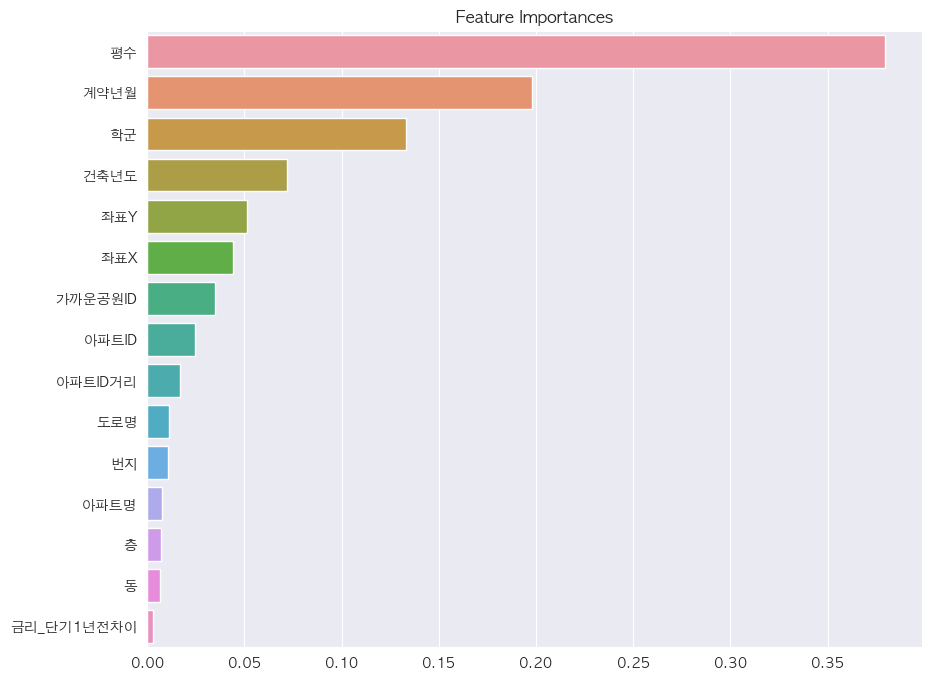

In [144]:
# 위 feature importance를 시각화해봅니다.
importances = pd.Series(model.feature_importances_, index=list(X_train.columns))
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.title("Feature Importances")
sns.barplot(x=importances, y=importances.index)
plt.show()

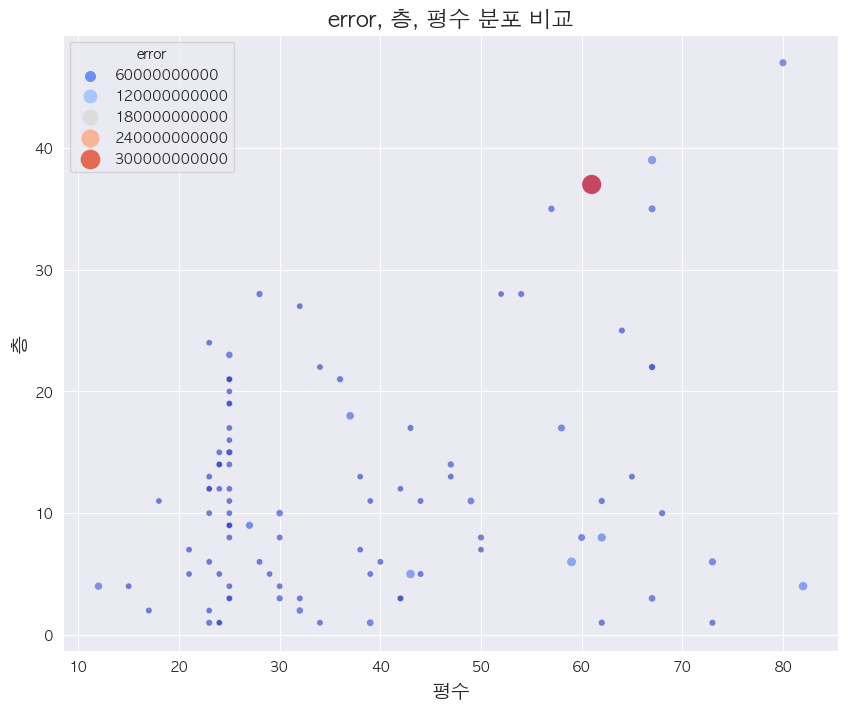

In [145]:
# 2D 히트맵으로 target, 층, 전용면적의 분포 비교
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=error_top100, 
    x='평수', 
    y='층', 
    size='error', 
    hue='error', 
    palette='coolwarm', 
    alpha=0.7, 
    sizes=(20, 200)
)
plt.title('error, 층, 평수 분포 비교', fontsize=16)
plt.xlabel('평수', fontsize=14)
plt.ylabel('층', fontsize=14)
plt.legend(title='error')
plt.grid(True)
plt.show()

In [146]:
print(error_top100['층'].value_counts().sort_values(ascending=False))
print(error_top100['평수'].value_counts())

층
1     7
3     7
11    6
5     6
4     5
6     5
8     5
12    5
14    5
21    5
13    4
10    4
9     4
22    3
17    3
2     3
7     3
15    3
28    3
35    2
19    2
24    1
27    1
20    1
37    1
25    1
23    1
47    1
18    1
39    1
16    1
Name: count, dtype: int64
평수
25    23
23     8
24     8
67     5
30     4
32     3
42     3
39     3
62     3
50     2
28     2
44     2
47     2
73     2
43     2
38     2
21     2
34     2
54     1
29     1
65     1
15     1
40     1
64     1
17     1
18     1
61     1
68     1
36     1
59     1
57     1
49     1
60     1
80     1
58     1
27     1
12     1
37     1
82     1
52     1
Name: count, dtype: int64


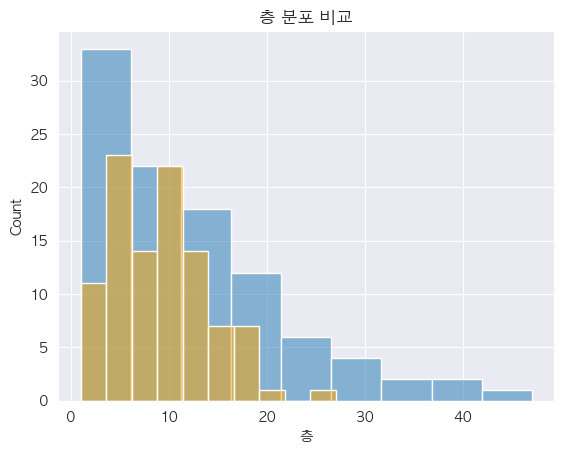

In [147]:
sns.histplot(data = error_top100, x='층', alpha=0.5)
sns.histplot(data = best_top100, x='층', color='orange', alpha=0.5)
plt.title('층 분포 비교')
plt.show()

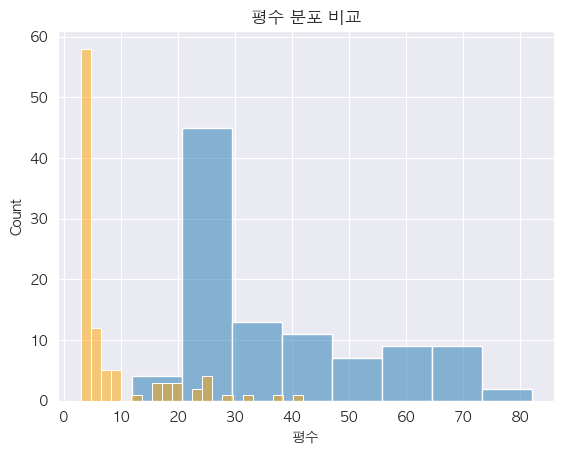

In [148]:
sns.histplot(data = error_top100, x='평수', alpha=0.5)
sns.histplot(data = best_top100, x='평수', color='orange', alpha=0.5)
plt.title('평수 분포 비교')
plt.show()

In [149]:
error_top100

,번지,아파트명,계약년월,층,건축년도,도로명,좌표X,좌표Y,평수,동,아파트ID,아파트ID거리,가까운공원ID,공원총면적,학군,target,pred,예측차이,error
3420,501,상봉듀오트리스,202301,37,2016,상봉로 131,127.092204,37.597362,61,상봉동,A10027670,0.003000,P00566,10742.0,0,185000.0,777000.0,-592000.0,3.504640e+11
3679,369-1,현대1차,202207,6,1976,압구정로29길 71,127.027926,37.533027,59,압구정동,A13589802,23.804947,P02575,20097.9,1,800000.0,564400.0,235600.0,5.550736e+10
2201,1496-24,트라움하우스3,202212,4,2002,명달로 97-14,127.002921,37.486202,82,서초동,A13784102,391.153802,P02373,675685.0,1,640000.0,417000.0,223000.0,4.972900e+10
3650,510-11,강남상가,202208,5,1974,압구정로2길 46,127.020669,37.518772,43,신사동,A10024029,170.244626,P02521,49165.1,1,129500.0,351700.0,-222200.0,4.937284e+10
4534,490,메세나폴리스,202209,39,2012,양화로 45,126.913938,37.551322,67,서교동,A12174601,0.000000,P01499,38516.5,0,510000.0,725600.0,-215600.0,4.648336e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824,27,주공,202301,1,1978,송파대로 567,127.092982,37.514368,24,잠실동,A13879102,2.189487,P02668,903435.1,1,229500.0,305776.0,-76276.0,5.818028e+09
221,902,강남센트럴아이파크,202212,19,2022,테헤란로44길 26,127.045688,37.500491,25,역삼동,A10023825,14.209567,P02640,17249.3,1,290000.0,213800.0,76200.0,5.806440e+09
3623,467,타워팰리스1,202207,28,2002,언주로30길 56,127.054439,37.488223,52,도곡동,A13527017,0.627425,P02514,284920.1,1,480000.0,404000.0,76000.0,5.776000e+09
2733,17,파크리오,202212,17,2008,올림픽로 435,127.106151,37.520537,25,신천동,A13824006,325.014421,P02701,1280674.1,1,174000.0,250000.0,-76000.0,5.776000e+09


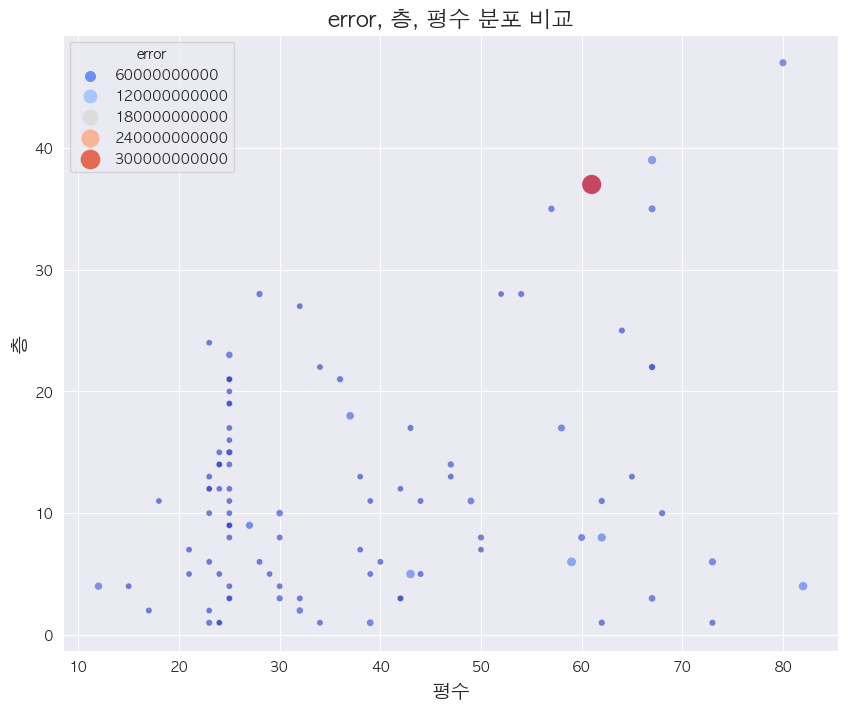

In [150]:
# 2D 히트맵으로 target, 층, 전용면적의 분포 비교
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=error_top100, 
    x='평수', 
    y='층', 
    size='error', 
    hue='error', 
    palette='coolwarm', 
    alpha=0.7, 
    sizes=(20, 200)
)
plt.title('error, 층, 평수 분포 비교', fontsize=16)
plt.xlabel('평수', fontsize=14)
plt.ylabel('층', fontsize=14)
plt.legend(title='error')
plt.grid(True)
plt.show()

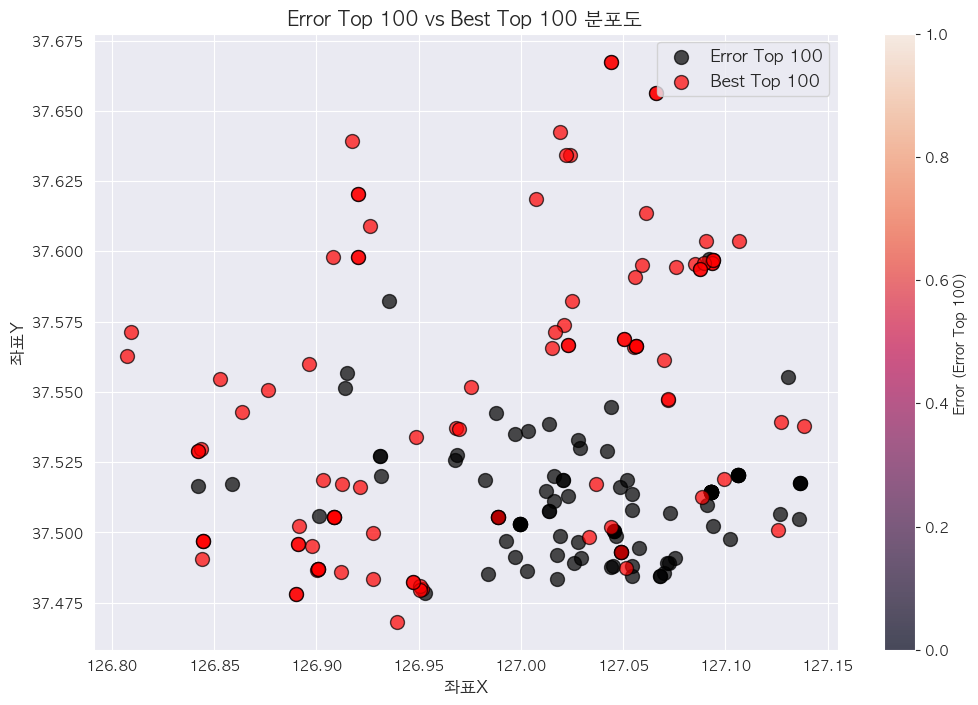

In [151]:
# 그래프 생성
plt.figure(figsize=(12, 8))

# error_top100 산점도
scatter1 = plt.scatter(
    error_top100['좌표X'], error_top100['좌표Y'], 
    c='black',  s=100, edgecolor='k', alpha=0.7, label='Error Top 100'
)

# best_top100 산점도
scatter2 = plt.scatter(
    best_top100['좌표X'], best_top100['좌표Y'], 
    c='red', s=100, edgecolor='k', alpha=0.7, label='Best Top 100'
)

# 컬러바 추가 (error_top100용)
plt.colorbar(scatter1, label='Error (Error Top 100)')

# 축 및 제목 설정
plt.xlabel('좌표X', fontsize=12)
plt.ylabel('좌표Y', fontsize=12)
plt.title('Error Top 100 vs Best Top 100 분포도', fontsize=14)
plt.grid(True)

# 범례 추가
plt.legend(fontsize=12)

# 그래프 표시
plt.show()

In [95]:
error_top100[error_top100['예측차이'] > 100000].value_counts()

번지       아파트명         계약년월    층   건축년도  도로명            좌표X         좌표Y        평수  구     동      가까운공원ID  아파트_unique_key                 클러스터  학군  target    pred      예측차이      error       
1-44     힐탑트레져1동      202301  3   2003  유엔빌리지길 200-16  127.013718  37.538466  67  용산구   한남동    P00198   용산구_한남동_1-44_힐탑트레져1동_2003      9     0   430000.0  278200.0  151800.0  2.304324e+10    1
1496-24  트라움하우스3      202212  4   2002  명달로 97-14      127.002921  37.486202  82  서초구   서초동    P02373   서초구_서초동_1496-24_트라움하우스3_2002   15    1   640000.0  256800.0  383200.0  1.468422e+11    1
189      개포주공4단지      202301  4   1982  삼성로 14         127.069985  37.485699  12  강남구   개포동    P02509   강남구_개포동_189_개포주공4단지_1982       17    1   370000.0  196400.0  173600.0  3.013696e+10    1
193-1    힐데스하임빌라      202207  6   1998  남부순환로377길 26   127.045027  37.488125  73  강남구   도곡동    P02556   강남구_도곡동_193-1_힐데스하임빌라_1998     6     1   500000.0  346400.0  153600.0  2.359296e+10    1
21-1     서울           202207  8   1976  

In [96]:
error_top100.columns

Index(['번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y', '평수', '구', '동',
       '가까운공원ID', '아파트_unique_key', '클러스터', '학군', 'target', 'pred', '예측차이',
       'error'],
      dtype='object')